<a href="https://colab.research.google.com/github/babahameed/trial/blob/main/Final_Project(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Importing necessary libraries

In [ ]:

import pandas as pd            # For data manipulation
import numpy as np             # For numerical operations
from sklearn.preprocessing import OneHotEncoder  # For converting categorical to numeric
from sklearn.compose import ColumnTransformer    # For applying transformations to specific columns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Loading data

In [ ]:

df = pd.read_csv("yield_df.csv")



# EXPLORATOTRY PROCESS

In [ ]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,Rice,1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [ ]:
df.shape

(28242, 7)

In [ ]:
df.describe(include='all')

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242,28242,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
unique,101,10,NaN,NaN,NaN,NaN,NaN
top,India,Potatoes,NaN,NaN,NaN,NaN,NaN
freq,4048,4276,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,NaN,NaN,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,NaN,NaN,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,NaN,NaN,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,NaN,NaN,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,NaN,NaN,2008.000000,104676.750000,1668.00000,48687.880000,26.000000


In [ ]:
df.duplicated().sum()

2310

In [ ]:
df.drop_duplicates(inplace=True)

# Dropping the unnamed index column
Reason: The 'Unnamed: 0' column is an index artifact from the CSV and not relevant for analysis.


In [ ]:

df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Displaying initial dataset info
Reason: Understanding the dataset's structure (columns, data types, missing values) helps plan preprocessing steps.
What it does: Prints the number of rows, columns, and a summary of data types and non-null counts.
print("Initial Dataset Info:")

In [ ]:

print(f"Shape: {df.shape}")
print(df.info())

Shape: (25932, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  object 
 1   Item                           25932 non-null  object 
 2   Year                           25932 non-null  int64  
 3   hg/ha_yield                    25932 non-null  int64  
 4   average_rain_fall_mm_per_year  25932 non-null  int64  
 5   pesticides_tonnes              25932 non-null  float64
 6   avg_temp                       25932 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.6+ MB
None


# Checking for missing values
Reason: Identifying missing values is the first step to decide whether to impute or drop rows.
What it does: Counts missing values per column and prints the result.

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)



Missing Values per Column:
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


### Number of Unique Areas(Countries) and Items(crop type) present

In [ ]:
len(df['Area'].unique())

101

In [ ]:
len(df['Item'].unique())

10

### countplot to show the country with the highest frequency and item counts

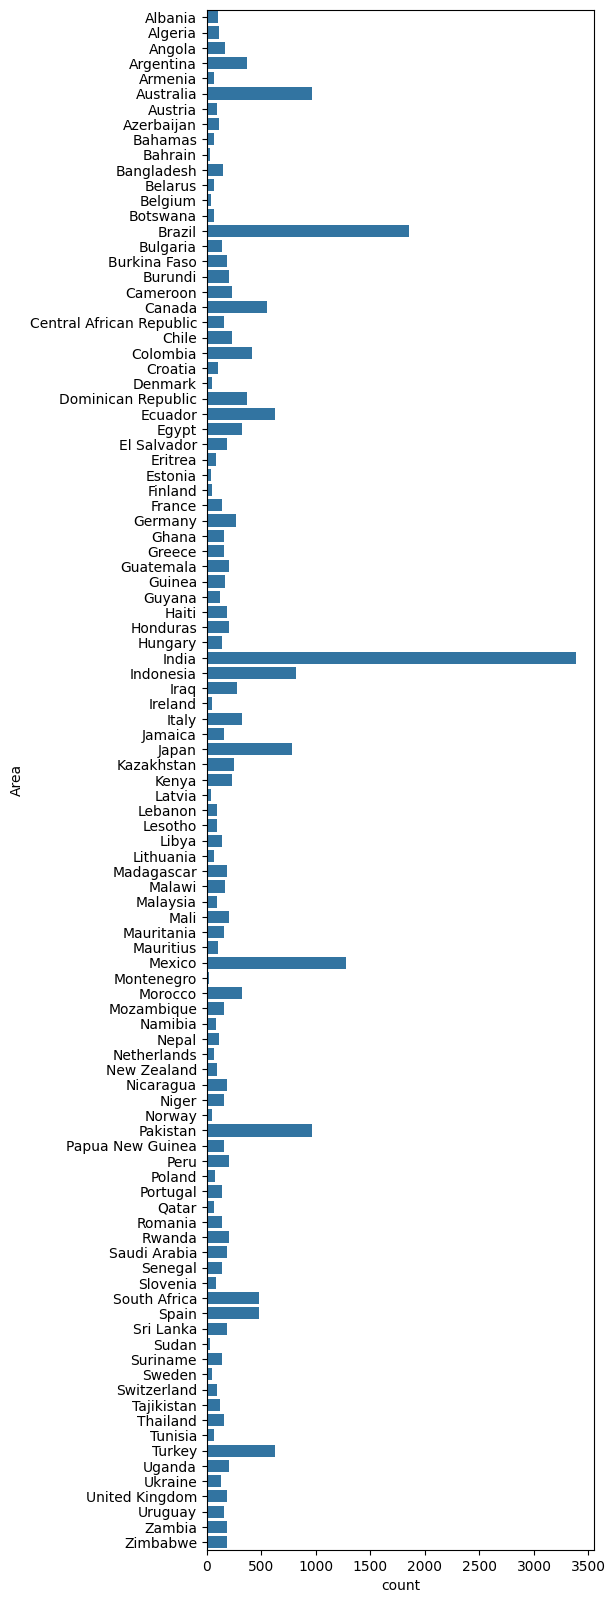

In [ ]:
plt.figure(figsize=(5,20))
sns.countplot(y = df['Area'])
plt.show()

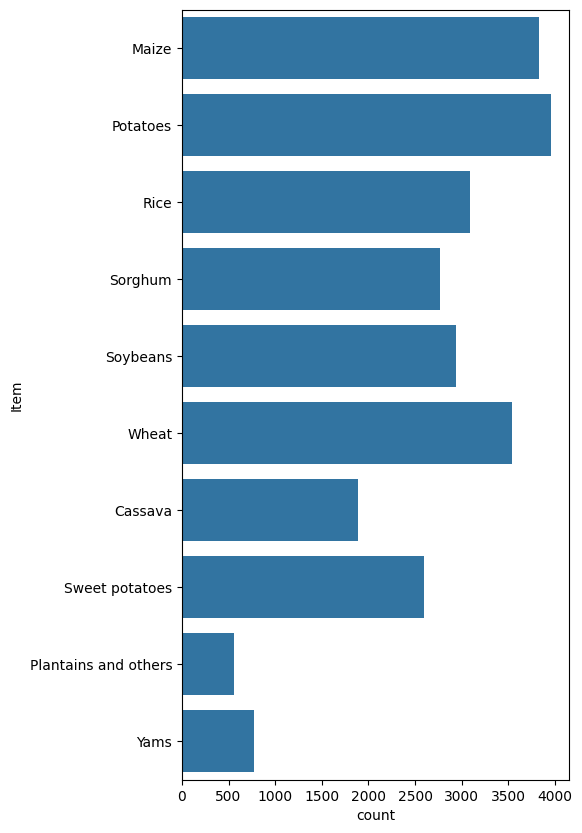

In [ ]:
plt.figure(figsize=(5,10))
sns.countplot(y = df['Item'])
plt.show()

### Yiel per country Analysis

In [ ]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

In [ ]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

In [ ]:
df['hg/ha_yield'].sum()

1996196943

### Graph showing Countries with thier corresponding  yield

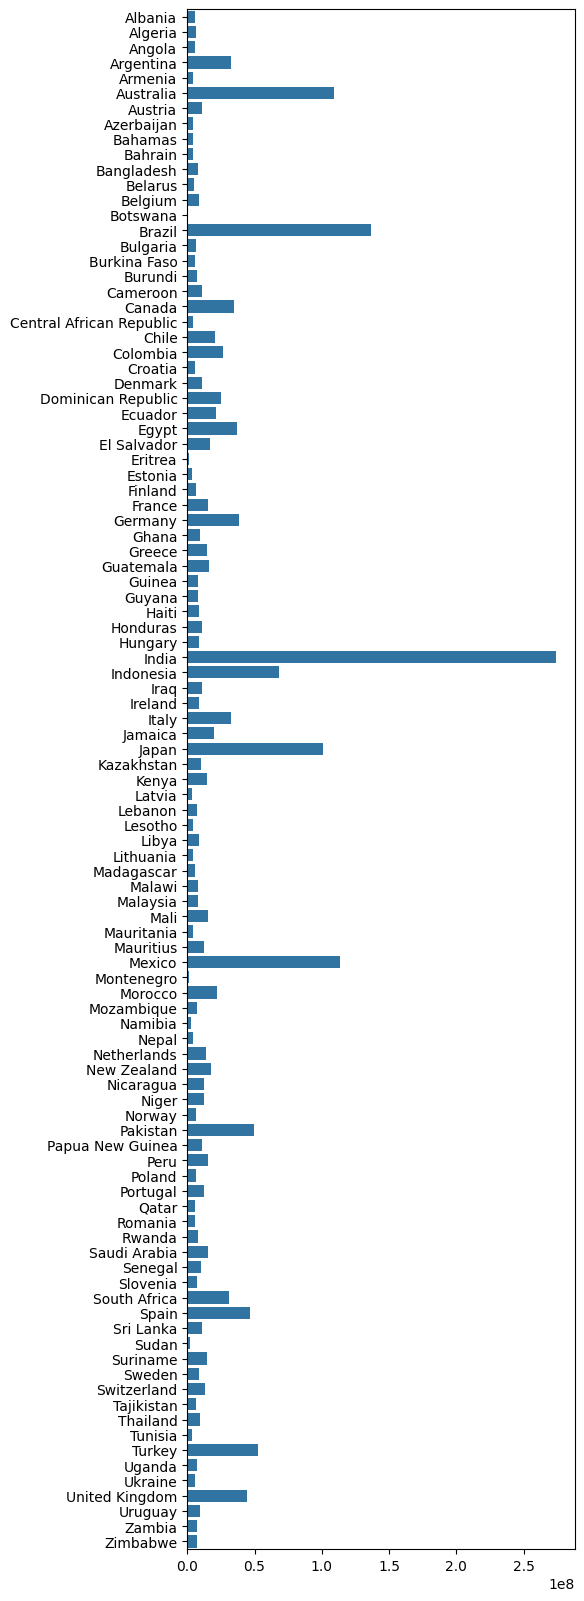

In [ ]:
plt.figure(figsize=(5,20))
sns.barplot(y = country, x = yield_per_country)
plt.show()

# Defining categorical and numerical columns

Reason: Different strategies are used for imputing categorical (mode) vs. numerical (median) columns.

What it does: Lists categorical and numerical columns based on their data types and dataset context.

In [ ]:
categorical_cols = ['Area', 'Item']
numerical_cols = ['Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
numerical_cols


['Year',
 'hg/ha_yield',
 'average_rain_fall_mm_per_year',
 'pesticides_tonnes',
 'avg_temp']

# Detecting outliers in numerical columns

 Reason: Outliers in yield, rainfall, pesticides, or temperature could skew ML models or indicate data errors.

What it does: Applies the detect_outliers function to each numerical column and prints the number of outliers and bounds.

 Defining the detect_outliers function.

In [ ]:

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

print("\nOutlier Detection (IQR Method):")
outlier_info = {}
for col in numerical_cols:
    outliers, lower_bound, upper_bound = detect_outliers(df, col)
    outlier_info[col] = {
        'num_outliers': len(outliers),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_values': outliers.tolist()[:10]  # Limit to first 10 for brevity
    }
    print(f"\nColumn: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"Sample outlier values: {outlier_info[col]['outlier_values']}")


Outlier Detection (IQR Method):

Column: Year
Number of outliers: 0
Lower bound: 1975.50, Upper bound: 2027.50
Sample outlier values: []

Column: hg/ha_yield
Number of outliers: 1918
Lower bound: -106262.00, Upper bound: 230426.00
Sample outlier values: [231111, 242211, 250538, 260110, 236393, 250764, 270526, 292806, 304291, 303218]

Column: average_rain_fall_mm_per_year
Number of outliers: 0
Lower bound: -1019.50, Upper bound: 3280.50
Sample outlier values: []

Column: pesticides_tonnes
Number of outliers: 1262
Lower bound: -64437.50, Upper bound: 111654.50
Sample outlier values: [136185.08, 136185.08, 136185.08, 136185.08, 136185.08, 136185.08, 136185.08, 136185.08, 136185.08, 136185.08]

Column: avg_temp
Number of outliers: 16
Lower bound: 2.36, Upper bound: 40.28
Sample outlier values: [1.63, 1.63, 1.63, 1.63, 1.63, 1.63, 1.61, 1.61, 1.61, 1.61]


# Function to detect and cap outliers using IQR

Reason: IQR identifies outliers robustly; capping preserves data while reducing extreme values’ impact.

 What it does: Calculates IQR bounds, caps values, and returns counts and bounds.


# Handling outliers and generating boxplots

Reason: Visualizing before and after capping confirms the effect on data distribution.

 What it does: Caps outliers and creates side-by-side boxplots for each numerical column.


Outlier Handling and Plotting:

Column: hg/ha_yield
Lower outliers capped: 0
Upper outliers capped: 1918
Lower bound: -106262.00, Upper bound: 230426.00
Before capping stats:
count     25932.000000
mean      76978.132925
std       84647.605552
min          50.000000
25%       19996.000000
50%       39530.000000
75%      104168.000000
max      501412.000000
Name: hg/ha_yield, dtype: float64
After capping stats:
count     25932.000000
mean      71586.582639
std       69413.690356
min          50.000000
25%       19996.000000
50%       39530.000000
75%      104168.000000
max      230426.000000
Name: hg/ha_yield, dtype: float64
Boxplot saved as 'boxplot_hg/ha_yield.png'

Column: average_rain_fall_mm_per_year
Lower outliers capped: 0
Upper outliers capped: 0
Lower bound: -1019.50, Upper bound: 3280.50
Before capping stats:
count    25932.000000
mean      1146.836688
std        717.391098
min         51.000000
25%        593.000000
50%       1083.000000
75%       1668.000000
max       3240.

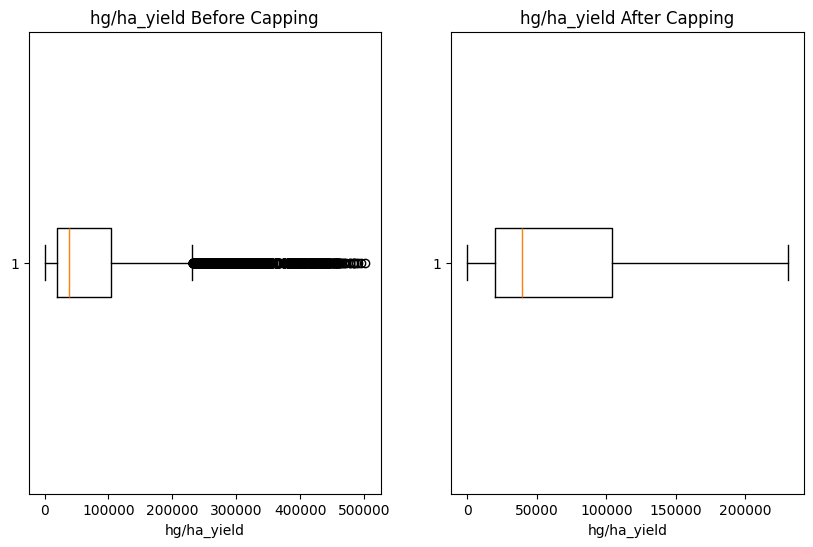

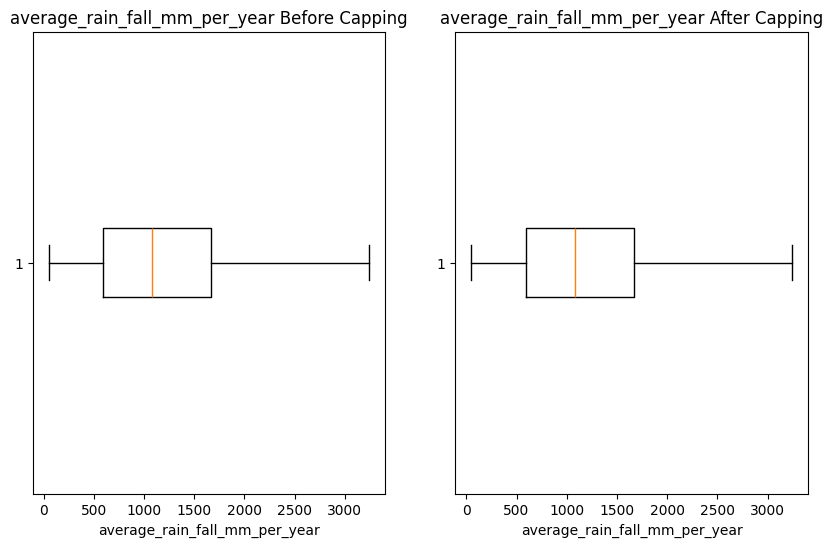

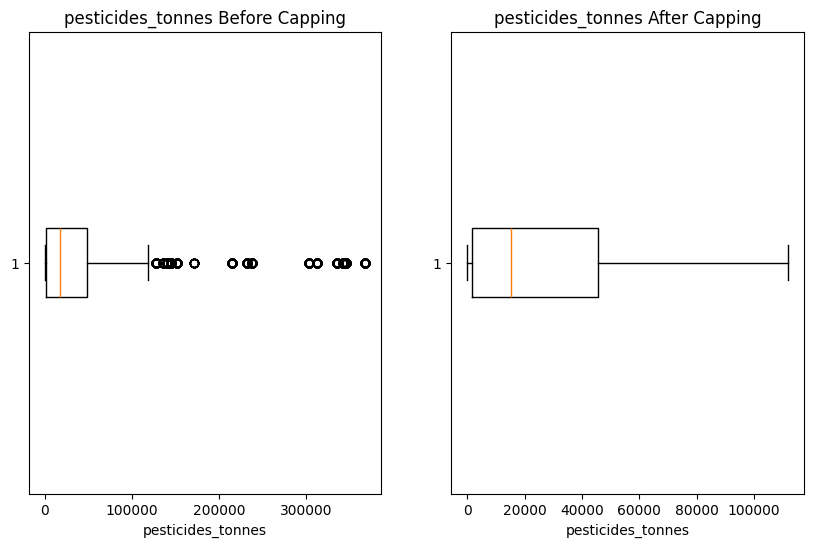

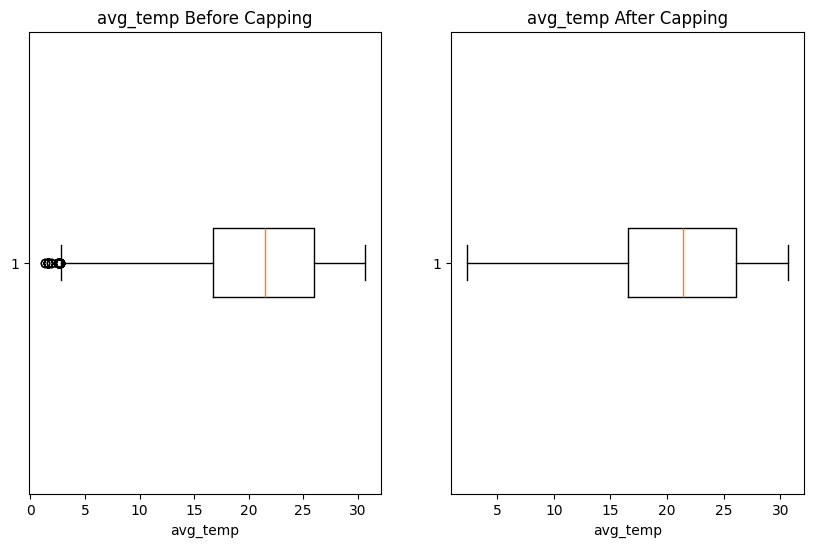

In [ ]:

df_original = pd.read_csv("yield_df.csv")

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Counting values to be capped
    lower_outliers = df[df[column] < lower_bound][column].count()
    upper_outliers = df[df[column] > upper_bound][column].count()

    # Capping outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return lower_outliers, upper_outliers, lower_bound, upper_bound

numerical_cols_for_outliers = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
outlier_info = {}
print("\nOutlier Handling and Plotting:")
for col in numerical_cols_for_outliers:
    # Storing original statistics
    original_stats = df[col].describe()

    # Creating boxplots before and after capping
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.boxplot(df_original[col], vert=False)
    plt.title(f'{col} Before Capping')
    plt.xlabel(col)

    # Capping outliers
    lower_outliers, upper_outliers, lower_bound, upper_bound = cap_outliers(df, col)
    outlier_info[col] = {
        'lower_outliers_capped': lower_outliers,
        'upper_outliers_capped': upper_outliers,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

    # Boxplot after capping
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col], vert=False)
    plt.title(f'{col} After Capping')
    plt.xlabel(col)

    # Printing results
    print(f"\nColumn: {col}")
    print(f"Lower outliers capped: {lower_outliers}")
    print(f"Upper outliers capped: {upper_outliers}")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"Before capping stats:\n{original_stats}")
    print(f"After capping stats:\n{df[col].describe()}")
    print(f"Boxplot saved as 'boxplot_{col}.png'")

# Statistics Before and After Capping

In [ ]:


def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Counting values to be capped
    lower_outliers = df[df[column] < lower_bound][column].count()
    upper_outliers = df[df[column] > upper_bound][column].count()

    # Capping outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return lower_outliers, upper_outliers, lower_bound, upper_bound

# Handling outliers in numerical columns (excluding Year)
# Reason: Year is discrete (1990–2013) and unlikely to have outliers; other columns may have extreme values affecting ML.
# What it does: Applies capping to hg/ha_yield, rainfall, pesticides, and temperature, and reports capped counts.
numerical_cols_for_outliers = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
outlier_info = {}
print("\nOutlier Handling (Capping at IQR Bounds):")
for col in numerical_cols_for_outliers:
    # Storing original statistics for comparison
    original_stats = df[col].describe()

    # Capping outliers
    lower_outliers, upper_outliers, lower_bound, upper_bound = cap_outliers(df, col)
    outlier_info[col] = {
        'lower_outliers_capped': lower_outliers,
        'upper_outliers_capped': upper_outliers,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

    # Printing results
    print(f"\nColumn: {col}")
    print(f"Lower outliers capped: {lower_outliers}")
    print(f"Upper outliers capped: {upper_outliers}")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"Before capping stats:\n{original_stats}")
    print(f"After capping stats:\n{df[col].describe()}")


Outlier Handling (Capping at IQR Bounds):

Column: hg/ha_yield
Lower outliers capped: 0
Upper outliers capped: 0
Lower bound: -106262.00, Upper bound: 230426.00
Before capping stats:
count     25932.000000
mean      71586.582639
std       69413.690356
min          50.000000
25%       19996.000000
50%       39530.000000
75%      104168.000000
max      230426.000000
Name: hg/ha_yield, dtype: float64
After capping stats:
count     25932.000000
mean      71586.582639
std       69413.690356
min          50.000000
25%       19996.000000
50%       39530.000000
75%      104168.000000
max      230426.000000
Name: hg/ha_yield, dtype: float64

Column: average_rain_fall_mm_per_year
Lower outliers capped: 0
Upper outliers capped: 0
Lower bound: -1019.50, Upper bound: 3280.50
Before capping stats:
count    25932.000000
mean      1146.836688
std        717.391098
min         51.000000
25%        593.000000
50%       1083.000000
75%       1668.000000
max       3240.000000
Name: average_rain_fall_mm_p

# Normal Distribution of the Crop yield before and after Capping

 Before Capping


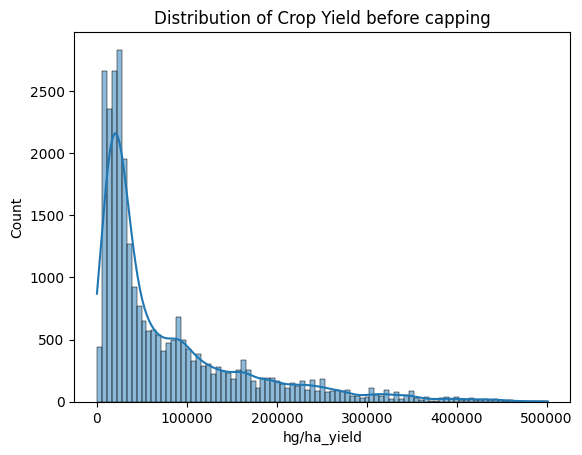

In [ ]:
print(' Before Capping')
sns.histplot(df_original['hg/ha_yield'], kde=True)
plt.title("Distribution of Crop Yield before capping")
plt.show()

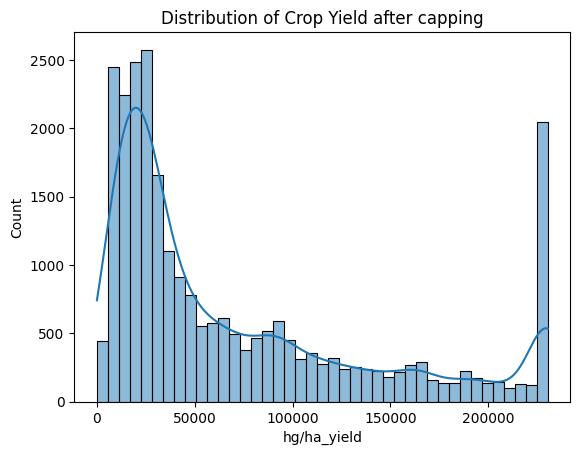

In [ ]:

sns.histplot(df['hg/ha_yield'], kde=True)
plt.title("Distribution of Crop Yield after capping")
plt.show()

# Saving the preprocessed dataset

Reason: The dataset, now free of missing values and with capped outliers, is ready for ML or analysis.

 What it does: Saves the DataFrame to a CSV file.

In [ ]:

df.to_csv('Capped_yield_df_preprocessed.csv', index=False)
print("\nPreprocessed dataset saved as 'Capped_yield_df_preprocessed.csv'")



Preprocessed dataset saved as 'Capped_yield_df_preprocessed.csv'



# Plotting yield trends over time

Reason: Checks temporal trends in hg/ha_yield to identify patterns (e.g., technological improvements).

What it does: Groups by Year, computes mean hg/ha_yield, and plots a line graph.

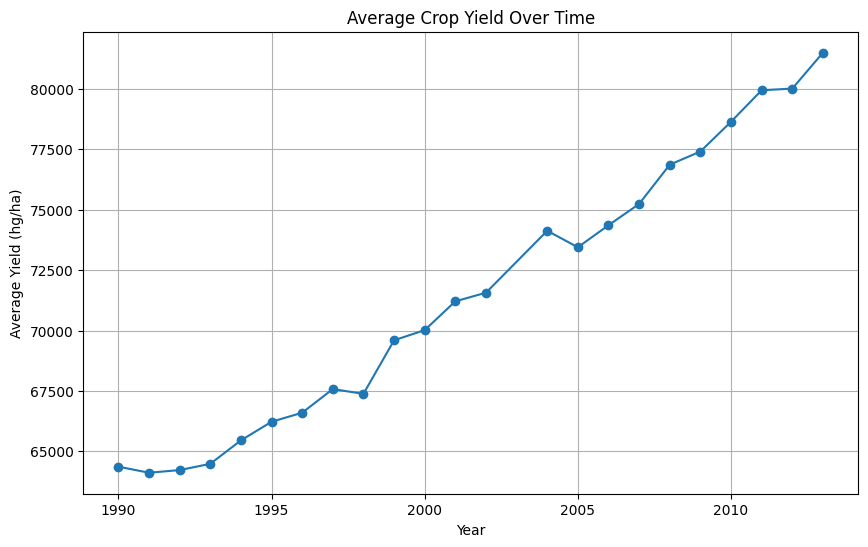

Interpretation of Yield Trends Over Time:
Average yield in 1990: 64364 hg/ha
Average yield in 2013: 81502 hg/ha
Yield increase: 17138 hg/ha
Percentage increase: 26.6%
This suggests technological or management improvements, with capping ensuring realistic trends. Year is a useful feature for modeling.


In [ ]:


yield_by_year = df.groupby('Year')['hg/ha_yield'].mean()
plt.figure(figsize=(10, 6))
plt.plot(yield_by_year.index, yield_by_year.values, marker='o')
plt.title('Average Crop Yield Over Time')
plt.xlabel('Year')
plt.ylabel('Average Yield (hg/ha)')
plt.grid(True)
plt.show()
# Interpretation of yield trends
# Reason: Quantifies the yield change to understand temporal effects.
# What it does: Computes and prints the yield change from start to end year and percentage increase.
yield_start = yield_by_year.iloc[0]
yield_end = yield_by_year.iloc[-1]
yield_increase = yield_end - yield_start
yield_percent_increase = (yield_increase / yield_start) * 100
print("Interpretation of Yield Trends Over Time:")
print(f"Average yield in {yield_by_year.index[0]}: {yield_start:.0f} hg/ha")
print(f"Average yield in {yield_by_year.index[-1]}: {yield_end:.0f} hg/ha")
print(f"Yield increase: {yield_increase:.0f} hg/ha")
print(f"Percentage increase: {yield_percent_increase:.1f}%")
print("This suggests technological or management improvements, with capping ensuring realistic trends. Year is a useful feature for modeling.")

# Computing and plotting correlation matrix

Reason: Identifies relationships between numerical features for modeling insights.

 What it does: Calculates Pearson correlations and visualizes with a heatmap.

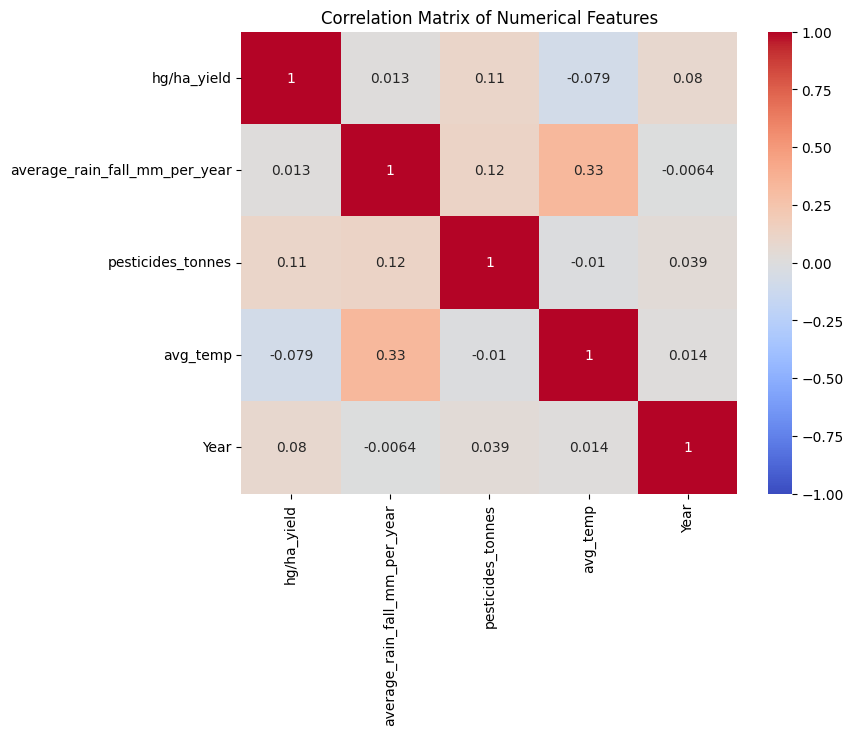

Interpretation of Correlation Matrix:
Correlation between Pesticide Use and Yield: 0.109
Correlation between Temperature and Yield: -0.079
Correlation between Rainfall and Yield: 0.013
Correlation between Year and Yield: 0.080
Moderate pesticide and year correlations suggest they drive yields. Weak temperature and rainfall correlations indicate non-linear effects, needing interactions or non-linear models.


In [ ]:

numerical_cols = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Year']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
# Interpretation of correlations
# Reason: Quantifies relationships to guide feature selection.
# What it does: Prints key correlations involving hg/ha_yield.
print("Interpretation of Correlation Matrix:")
print(f"Correlation between Pesticide Use and Yield: {corr_matrix.loc['hg/ha_yield', 'pesticides_tonnes']:.3f}")
print(f"Correlation between Temperature and Yield: {corr_matrix.loc['hg/ha_yield', 'avg_temp']:.3f}")
print(f"Correlation between Rainfall and Yield: {corr_matrix.loc['hg/ha_yield', 'average_rain_fall_mm_per_year']:.3f}")
print(f"Correlation between Year and Yield: {corr_matrix.loc['hg/ha_yield', 'Year']:.3f}")
print("Moderate pesticide and year correlations suggest they drive yields. Weak temperature and rainfall correlations indicate non-linear effects, needing interactions or non-linear models.")

# Scatter plot of avg_temp vs. hg/ha_yield

Reason: Explores temperature’s impact on yield (e.g., heat stress effects).

 What it does: Creates a scatter plot to visualize the relationship.

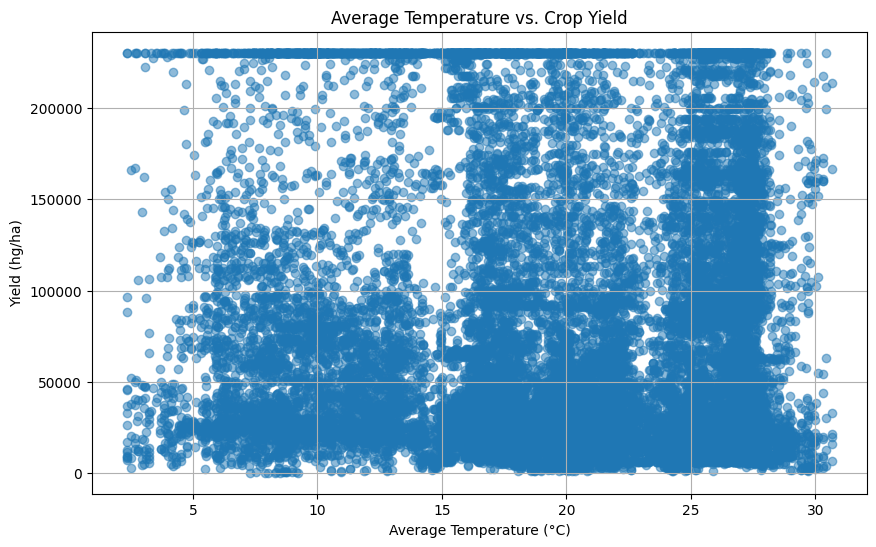

Interpretation of Temperature vs. Yield:
Average yield at 15–25°C: 67627 hg/ha
Average yield above 30°C: 81837 hg/ha
Lower yields at high temperatures suggest heat stress. Capping ensures realistic yields. Temperature may need binning or crop-specific modeling.


In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(df['avg_temp'], df['hg/ha_yield'], alpha=0.5)
plt.title('Average Temperature vs. Crop Yield')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Yield (hg/ha)')
plt.grid(True)
plt.show()
# Interpretation of temperature vs. yield
# Reason: Quantifies yield differences across temperature ranges.
# What it does: Computes and prints yields for moderate and high temperatures.
yield_moderate_temp = df[df['avg_temp'].between(15, 25)]['hg/ha_yield'].mean()
yield_high_temp = df[df['avg_temp'] > 30]['hg/ha_yield'].mean()
print("Interpretation of Temperature vs. Yield:")
print(f"Average yield at 15–25°C: {yield_moderate_temp:.0f} hg/ha")
print(f"Average yield above 30°C: {yield_high_temp:.0f} hg/ha")
print("Lower yields at high temperatures suggest heat stress. Capping ensures realistic yields. Temperature may need binning or crop-specific modeling.")

# Scatter plot of pesticides_tonnes vs. hg/ha_yield

Reason: Checks if pesticide use drives higher yields.

 What it does: Creates a scatter plot to explore the relationship.

 # Interpretation of pesticides vs. yield

Reason: Quantifies yield differences by pesticide usage.

 What it does: Computes and prints yields for low and high pesticide groups.

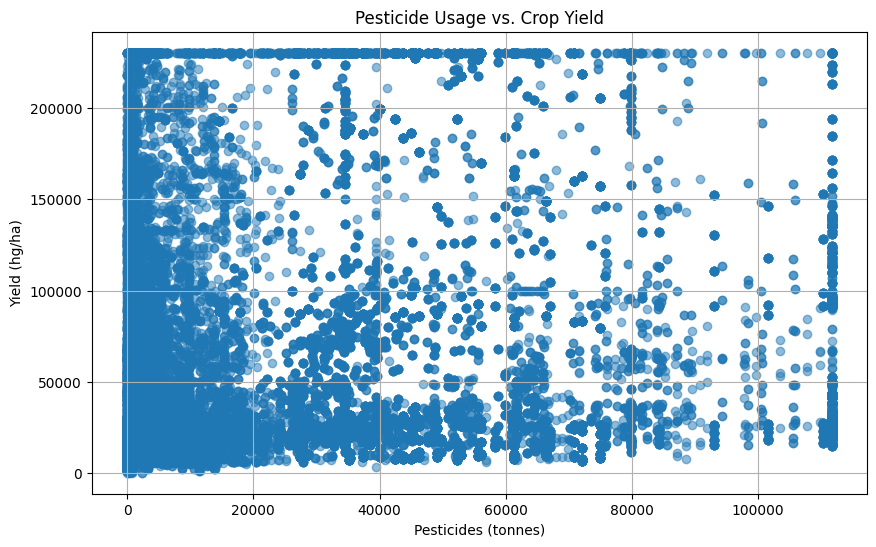

Interpretation of Pesticide Usage vs. Yield:
Average yield at low pesticides (<15373 tonnes): 63569 hg/ha
Average yield at high pesticides (≥15373 tonnes): 79532 hg/ha
Higher yields with pesticides suggest effectiveness, but benefits may plateau. Capping ensures realistic trends. Pesticides are a key feature, possibly needing log transformation.


In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(df['pesticides_tonnes'], df['hg/ha_yield'], alpha=0.5)
plt.title('Pesticide Usage vs. Crop Yield')
plt.xlabel('Pesticides (tonnes)')
plt.ylabel('Yield (hg/ha)')
plt.grid(True)
plt.show()

median_pesticides = df['pesticides_tonnes'].median()
yield_low_pesticides = df[df['pesticides_tonnes'] < median_pesticides]['hg/ha_yield'].mean()
yield_high_pesticides = df[df['pesticides_tonnes'] >= median_pesticides]['hg/ha_yield'].mean()
print("Interpretation of Pesticide Usage vs. Yield:")
print(f"Average yield at low pesticides (<{median_pesticides:.0f} tonnes): {yield_low_pesticides:.0f} hg/ha")
print(f"Average yield at high pesticides (≥{median_pesticides:.0f} tonnes): {yield_high_pesticides:.0f} hg/ha")
print("Higher yields with pesticides suggest effectiveness, but benefits may plateau. Capping ensures realistic trends. Pesticides are a key feature, possibly needing log transformation.")


# Climate Impact

## Scatter plot of average_rain_fall_mm_per_year vs. hg/ha_yield

Reason: Rainfall is critical for crops; this checks its impact.

What it does: Creates a scatter plot to explore the relationship.

## Interpretation of rainfall vs. yield

Reason: Quantifies yield differences across rainfall ranges.

What it does: Computes and prints yields for optimal and high rainfall ranges.

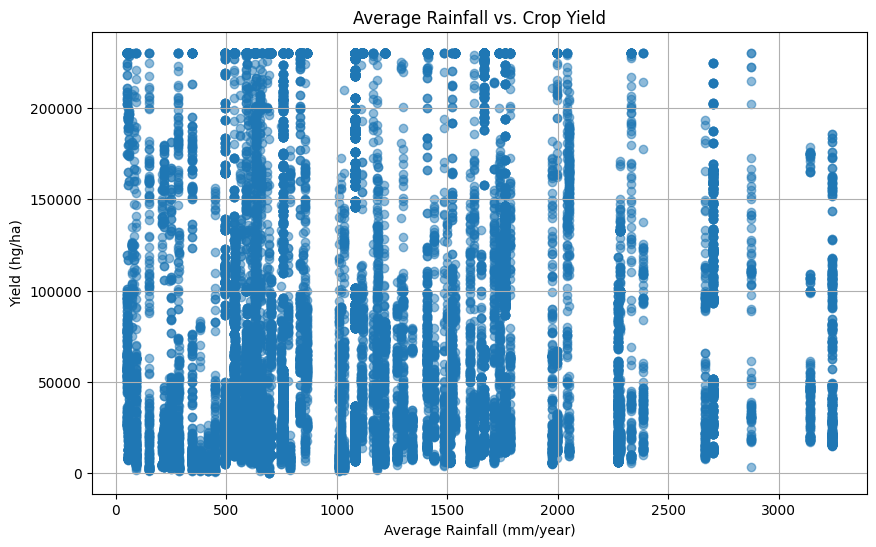

Interpretation of Rainfall vs. Yield:
Correlation between Rainfall and Yield: 0.013
Average yield at 1000–1500 mm/year: 66668 hg/ha
Average yield above 2000 mm/year: 70868 hg/ha
Optimal rainfall boosts yields, but excess may harm. Capping ensures realistic yields. Rainfall needs polynomial features or thresholding.


In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(df['average_rain_fall_mm_per_year'], df['hg/ha_yield'], alpha=0.5)
plt.title('Average Rainfall vs. Crop Yield')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Yield (hg/ha)')
plt.grid(True)
plt.show()

yield_optimal_rain = df[df['average_rain_fall_mm_per_year'].between(1000, 1500)]['hg/ha_yield'].mean()
yield_high_rain = df[df['average_rain_fall_mm_per_year'] > 2000]['hg/ha_yield'].mean()
print("Interpretation of Rainfall vs. Yield:")
print(f"Correlation between Rainfall and Yield: {corr_matrix.loc['hg/ha_yield', 'average_rain_fall_mm_per_year']:.3f}")
print(f"Average yield at 1000–1500 mm/year: {yield_optimal_rain:.0f} hg/ha")
print(f"Average yield above 2000 mm/year: {yield_high_rain:.0f} hg/ha")
print("Optimal rainfall boosts yields, but excess may harm. Capping ensures realistic yields. Rainfall needs polynomial features or thresholding.")

# Analyzing temperature threshold for yield drop

Reason: Identifies if high temperatures reduce yields.

 What it does: Bins avg_temp and plots mean yield per bin.

 # Analyzing temperature threshold for yield drop

Reason: Identifies if high temperatures reduce yields.

What it does: Bins avg_temp and plots mean yield per bin.

C:\Users\mufta\AppData\Local\Temp\ipykernel_31988\1785286717.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yield_by_temp_bin = df.groupby(temp_bins)['hg/ha_yield'].mean()


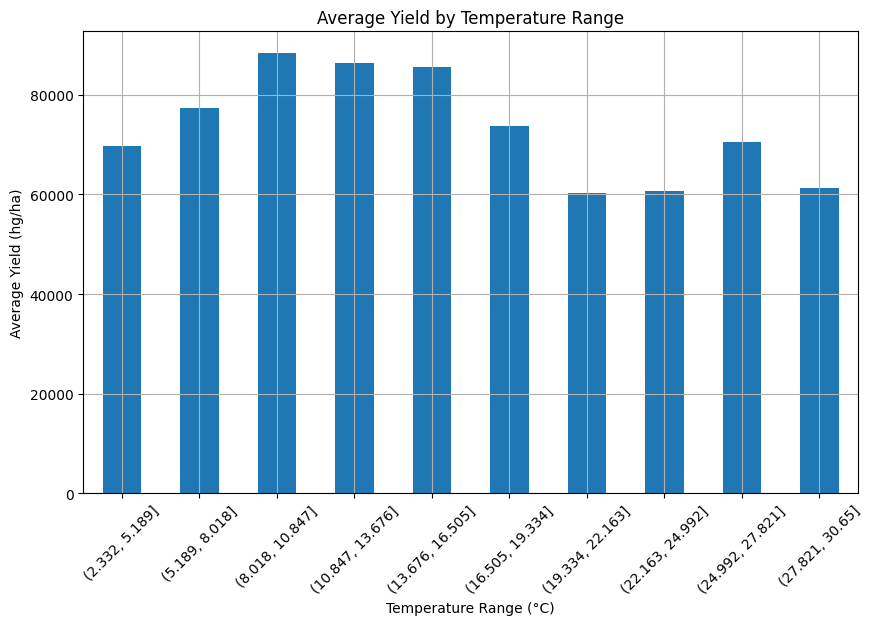

Interpretation of Yield by Temperature Range:
Average yield at 15–25°C: 67627 hg/ha
Average yield above 30°C: 81837 hg/ha
Yield drop above 30°C: -21.0%
A significant drop indicates a heat stress threshold. Capping ensures realistic yields. Use a binary feature for temperatures above 30°C.


In [ ]:

temp_bins = pd.cut(df['avg_temp'], bins=10)
yield_by_temp_bin = df.groupby(temp_bins)['hg/ha_yield'].mean()
plt.figure(figsize=(10, 6))
yield_by_temp_bin.plot(kind='bar')
plt.title('Average Yield by Temperature Range')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Average Yield (hg/ha)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

yield_optimal_temp_bin = df[df['avg_temp'].between(15, 25)]['hg/ha_yield'].mean()
yield_high_temp_bin = df[df['avg_temp'] > 30]['hg/ha_yield'].mean()
yield_drop_percent = ((yield_optimal_temp_bin - yield_high_temp_bin) / yield_optimal_temp_bin) * 100
print("Interpretation of Yield by Temperature Range:")
print(f"Average yield at 15–25°C: {yield_optimal_temp_bin:.0f} hg/ha")
print(f"Average yield above 30°C: {yield_high_temp_bin:.0f} hg/ha")
print(f"Yield drop above 30°C: {yield_drop_percent:.1f}%")
print("A significant drop indicates a heat stress threshold. Capping ensures realistic yields. Use a binary feature for temperatures above 30°C.")

# Resource Usage

# Bar plot of mean hg/ha_yield by Item for high vs. low pesticide usage

Reason: Explores pesticide impact across crop types, replacing boxplot for clarity in mean comparisons.

What it does: Groups data by Item and pesticide group, computes mean yields, and plots side-by-side bars.

# Interpretation of yield by crop and pesticides

Reason: Quantifies pesticide impact for key crops.

What it does: Computes and prints mean yields for two crops in high/low groups.

<Figure size 1200x600 with 0 Axes>

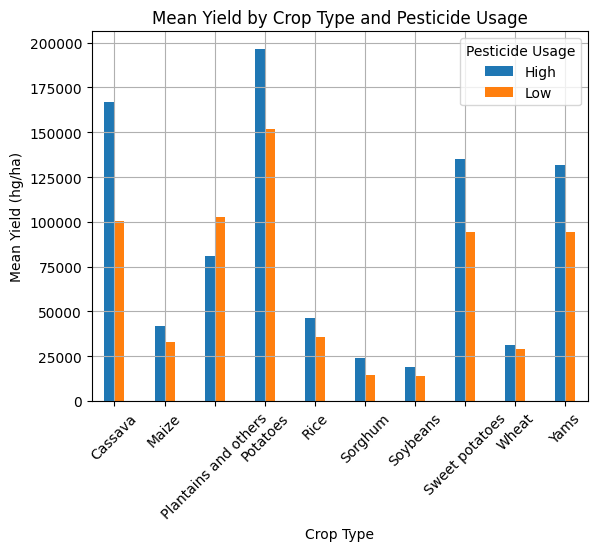

Interpretation of Mean Yield by Crop Type and Pesticide Usage:
Mean yield for Potatoes (high pesticides): 196490 hg/ha
Mean yield for Potatoes (low pesticides): 152092 hg/ha
Mean yield for Sorghum (high pesticides): 24064 hg/ha
Mean yield for Sorghum (low pesticides): 14263 hg/ha
Pesticides boost yields for some crops (e.g., Potatoes) but not others (e.g., Sorghum). Capping ensures realistic means. Use interaction terms for crop-specific effects.


In [ ]:

median_pesticides = df['pesticides_tonnes'].median()
df['pesticide_group'] = df['pesticides_tonnes'].apply(lambda x: 'High' if x > median_pesticides else 'Low')
yield_by_item_pesticide = df.groupby(['Item', 'pesticide_group'])['hg/ha_yield'].mean().unstack()
plt.figure(figsize=(12, 6))
yield_by_item_pesticide.plot(kind='bar', width=0.4)
plt.title('Mean Yield by Crop Type and Pesticide Usage')
plt.xlabel('Crop Type')
plt.ylabel('Mean Yield (hg/ha)')
plt.legend(title='Pesticide Usage')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

potatoes_high = df[(df['Item'] == 'Potatoes') & (df['pesticide_group'] == 'High')]['hg/ha_yield'].mean()
potatoes_low = df[(df['Item'] == 'Potatoes') & (df['pesticide_group'] == 'Low')]['hg/ha_yield'].mean()
sorghum_high = df[(df['Item'] == 'Sorghum') & (df['pesticide_group'] == 'High')]['hg/ha_yield'].mean()
sorghum_low = df[(df['Item'] == 'Sorghum') & (df['pesticide_group'] == 'Low')]['hg/ha_yield'].mean()
print("Interpretation of Mean Yield by Crop Type and Pesticide Usage:")
print(f"Mean yield for Potatoes (high pesticides): {potatoes_high:.0f} hg/ha")
print(f"Mean yield for Potatoes (low pesticides): {potatoes_low:.0f} hg/ha")
print(f"Mean yield for Sorghum (high pesticides): {sorghum_high:.0f} hg/ha")
print(f"Mean yield for Sorghum (low pesticides): {sorghum_low:.0f} hg/ha")
print("Pesticides boost yields for some crops (e.g., Potatoes) but not others (e.g., Sorghum). Capping ensures realistic means. Use interaction terms for crop-specific effects.")

#  Categorical Trends

# Bar plot of mean hg/ha_yield by Item

Reason: Identifies crops with high/low yields, replacing boxplot to focus on mean yields.

What it does: Computes mean yield per Item, sorts by yield, and plots a bar graph.

# Interpretation of yield by crop type

Reason: Identifies resilient crops for feature prioritization.

What it does: Computes and prints mean yields for highest/lowest crops.

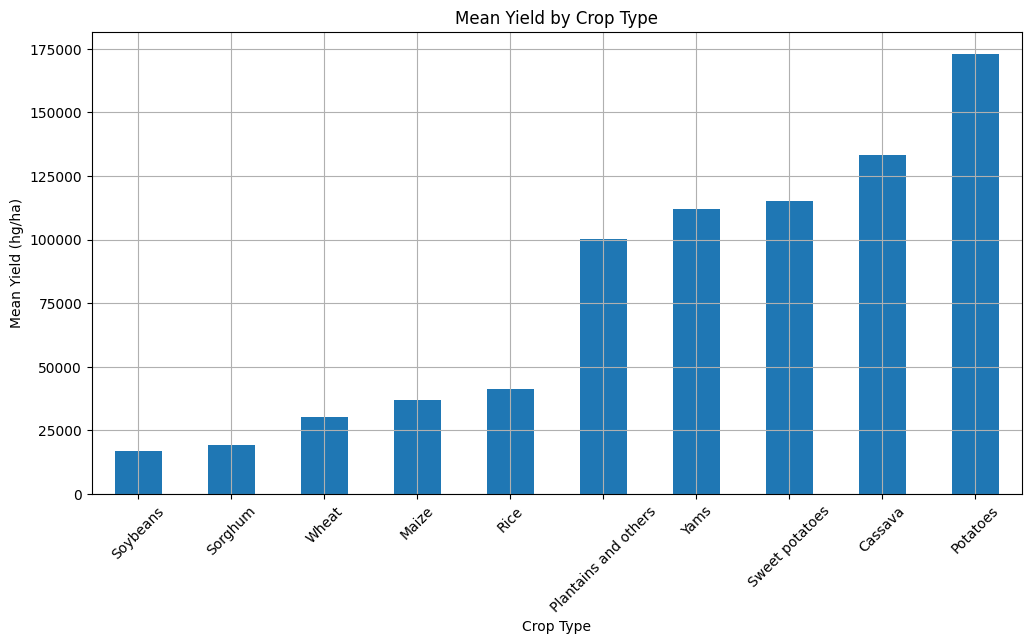

Interpretation of Mean Yield by Crop Type:
Mean yield for Potatoes: 172978 hg/ha
Mean yield for Soybeans: 16992 hg/ha
Highest yielding crop: Potatoes
Lowest yielding crop: Soybeans
High-yield crops are more resilient. Capping ensures realistic means. Item is critical for modeling, requiring one-hot encoding.


In [ ]:

mean_yields = df.groupby('Item')['hg/ha_yield'].mean().sort_values()
plt.figure(figsize=(12, 6))
mean_yields.plot(kind='bar')
plt.title('Mean Yield by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Mean Yield (hg/ha)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

highest_crop = mean_yields.index[-1]
lowest_crop = mean_yields.index[0]
print("Interpretation of Mean Yield by Crop Type:")
print(f"Mean yield for {highest_crop}: {mean_yields.iloc[-1]:.0f} hg/ha")
print(f"Mean yield for {lowest_crop}: {mean_yields.iloc[0]:.0f} hg/ha")
print(f"Highest yielding crop: {highest_crop}")
print(f"Lowest yielding crop: {lowest_crop}")
print("High-yield crops are more resilient. Capping ensures realistic means. Item is critical for modeling, requiring one-hot encoding.")

# Plotting yield trends for top 5 Areas with steepest yield changes

Reason: Identifies regions with significant yield changes (no boxplot, unchanged).

 What it does: Computes average yearly yield change per Area, selects top 5, and plots trends.

 # Interpretation of yield trends by area

Reason: Quantifies yield changes for key regions.

What it does: Computes and prints average yearly yield change for top areas.

C:\Users\mufta\AppData\Local\Temp\ipykernel_31988\454990261.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  area_yield_change = df.groupby('Area').apply(lambda x: x.groupby('Year')['hg/ha_yield'].mean().diff().abs().mean())


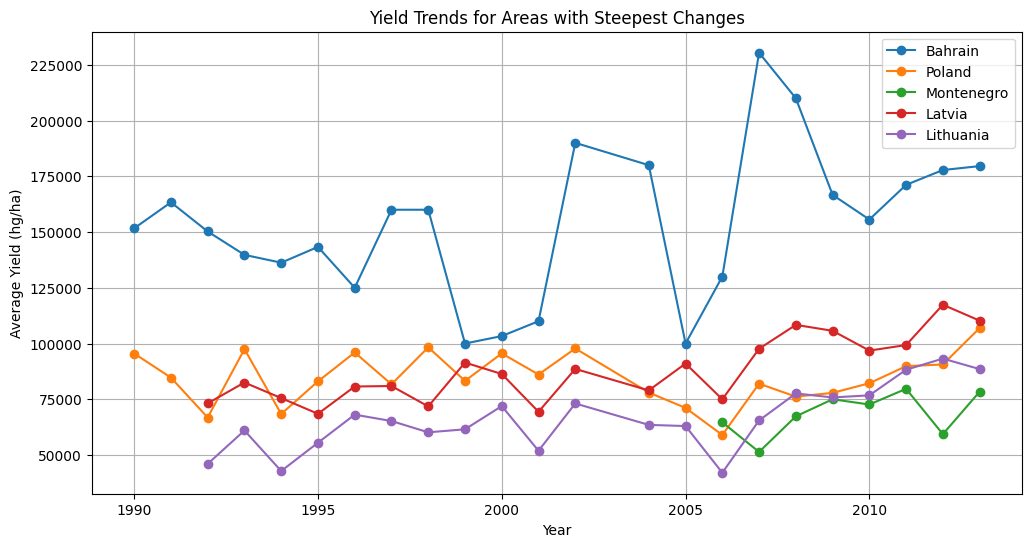

Interpretation of Yield Trends by Area:
Average yearly yield change for Bahrain: 25836 hg/ha
Average yearly yield change for Poland: 13355 hg/ha
Average yearly yield change for Montenegro: 12239 hg/ha
Average yearly yield change for Latvia: 10814 hg/ha
Average yearly yield change for Lithuania: 10495 hg/ha
Increasing trends suggest agricultural investment; declines indicate challenges. Capping ensures realistic trends. Area needs encoding due to high cardinality.


In [ ]:

area_yield_change = df.groupby('Area').apply(lambda x: x.groupby('Year')['hg/ha_yield'].mean().diff().abs().mean())
top_areas = area_yield_change.nlargest(5).index
plt.figure(figsize=(12, 6))
for area in top_areas:
    area_data = df[df['Area'] == area].groupby('Year')['hg/ha_yield'].mean()
    plt.plot(area_data.index, area_data.values, marker='o', label=area)
plt.title('Yield Trends for Areas with Steepest Changes')
plt.xlabel('Year')
plt.ylabel('Average Yield (hg/ha)')
plt.legend()
plt.grid(True)
plt.show()

print("Interpretation of Yield Trends by Area:")
for area in top_areas:
    area_change = area_yield_change[area]
    print(f"Average yearly yield change for {area}: {area_change:.0f} hg/ha")
print("Increasing trends suggest agricultural investment; declines indicate challenges. Capping ensures realistic trends. Area needs encoding due to high cardinality.")

# MACHINE LEARNING MODELING

### Splitting the dataset into the dependant(y) and independent variables(X).

In [ ]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [ ]:
X.shape

(25932, 7)

In [ ]:
y.shape

(25932,)

### Target Distribution (dependent variable)

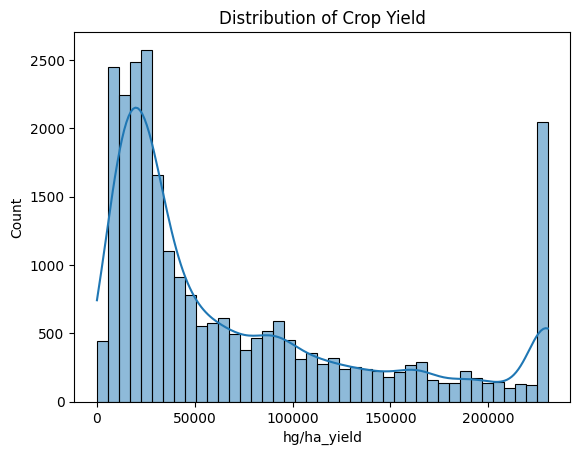

In [ ]:

sns.histplot(y, kde=True)
plt.title("Distribution of Crop Yield")
plt.show()

In [ ]:
X.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,pesticide_group
0,Albania,Maize,1990,1485,121.0,16.37,Low
1,Albania,Potatoes,1990,1485,121.0,16.37,Low
2,Albania,Rice,1990,1485,121.0,16.37,Low
3,Albania,Sorghum,1990,1485,121.0,16.37,Low
4,Albania,Soybeans,1990,1485,121.0,16.37,Low


# Import models for training and testing

1.  Split data into training and testing sets

2. Drop the 'pesticide_group' column before creating the preprocessor

3. Create a ColumnTransformer to preprocess the data
4. OneHotEncoder for categorical features, StandardScaler for numerical features

5. Fit and transform the training data

6. Train and evaluate the models


6. Transform the testing data using the fitted preprocessor

7. Make prediction

   ## Regression Models
   
    1. Linear Regression
    2. Lasso
    3. Ridge
    4. Decision Tree
    5. KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

X_train = X_train.drop(columns=['pesticide_group'], errors='ignore')
X_test = X_test.drop(columns=['pesticide_group'], errors='ignore')


preprocessor = ColumnTransformer(
    transformers=[
        ('StandardScale', StandardScaler(), ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']),
        ('OneHotEncode', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Area', 'Item'])  # sparse=False for compatibility
    ],
    remainder='passthrough'
)


X_train_transformed = preprocessor.fit_transform(X_train)

X_test_transformed = preprocessor.transform(X_test)


models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
}

# Train and evaluate the models
for name, md in models.items():
    # Use transformed data for training and prediction
    md.fit(X_train_transformed, y_train)
    y_pred = md.predict(X_test_transformed)
    print(f"{name}: mae : {mean_absolute_error(y_test, y_pred)} score : {r2_score(y_test, y_pred)}")


def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create a DataFrame for the input features (consistent with training data)
    features = pd.DataFrame([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]],
                            columns=['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item'])

    # Transform the features using the preprocessor
    transform_features = preprocessor.transform(features)

    # Make prediction
    predicted_yeild = dtr.predict(transform_features).reshape(-1, 1)

    return predicted_yeild[0][0]

Linear Regression: mae : 22787.445160066487 score : 0.8013590693864504
Lasso: mae : 22774.034936226548 score : 0.801385986967111
Ridge: mae : 22772.736658765723 score : 0.8013645512225961
Decision Tree: mae : 3294.6088297667243 score : 0.9816249324603107
KNN: mae : 3548.453903990746 score : 0.9879831789728392


### Chose  DecisionTreeRegressor as base model for our prediction

In [ ]:
# Initialize the DecisionTreeRegressor
dtr = DecisionTreeRegressor()

# Train the model using the transformed training data
dtr.fit(X_train_transformed, y_train)

# Make predictions on the transformed test data
prediction = dtr.predict(X_test_transformed)

### Creating a dataFarme for the predicted yields and renaming the column

In [ ]:
#Prediction=pd.DataFrame(prediction)


prediction

array([38441., 22814., 25700., ..., 25344., 34879., 77391.])

In [ ]:
Prediction=Prediction.rename(columns={0:'Predicted values'})
Prediction

,Predicted values
0,41293.0
1,22814.0
2,25700.0
3,63889.0
4,17575.0
...,...
5182,17872.0
5183,32342.0
5184,11488.0
5185,34879.0


In [ ]:
y_test

17096    41004
723      22814
7132     25700
8552     61191
9740     17132
         ...  
23168    17695
10444    34097
27747    25653
22842    34879
2043     78182
Name: hg/ha_yield, Length: 5187, dtype: int64

In [ ]:
results = pd.DataFrame({
    'Actual': y_test,    # use .flatten() if it's a 2D array
    'Predicted': y_pred})

In [ ]:
results

,Actual,Predicted
17096,41004,36704.4
723,22814,26340.4
7132,25700,21543.2
8552,61191,61772.8
9740,17132,17210.6
...,...,...
23168,17695,17864.6
10444,34097,38302.2
27747,25653,23360.4
22842,34879,35078.6


### Creating a prediction system for our model

In [ ]:
def prediction(Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item]], dtype = object)
    transform_features = preprocessor.transform(features)
    predicted_yeild = dtr.predict(transform_features).reshape(-1,1)
    return predicted_yeild[0][0]

In [ ]:
def prediction(Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item):
    # DataFrame for the input features with correct column names
    features = pd.DataFrame([[Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item]],
                            columns=['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item'])
    transform_features = preprocessor.transform(features)
    predicted_yeild = dtr.predict(transform_features).reshape(-1,1)
    return predicted_yeild[0][0]

In [ ]:
result = prediction(1990,1485.0,121.0,16.37,'Ghana','Maize')

In [ ]:
result

18000.0

# Creating pickle files for app integration

#### 1. import pickle

#### 2. pickle.dump(dtr, open("dtr.pkl","wb"))

#### 3. pickle.dump(preprocessor, open("preprocessor.pkl","wb"))

In [ ]:
# After training your model in notebook
import pickle

# Save model and preprocessor
with open('dtr.pkl', 'wb') as f:
    pickle.dump(dtr, f)  # Replace 'dtr_model' with your actual model variable

with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)  # Save your ColumnTransformer/StandardScaler

# Scatter plot showing the Actual yield and the Predicted yield

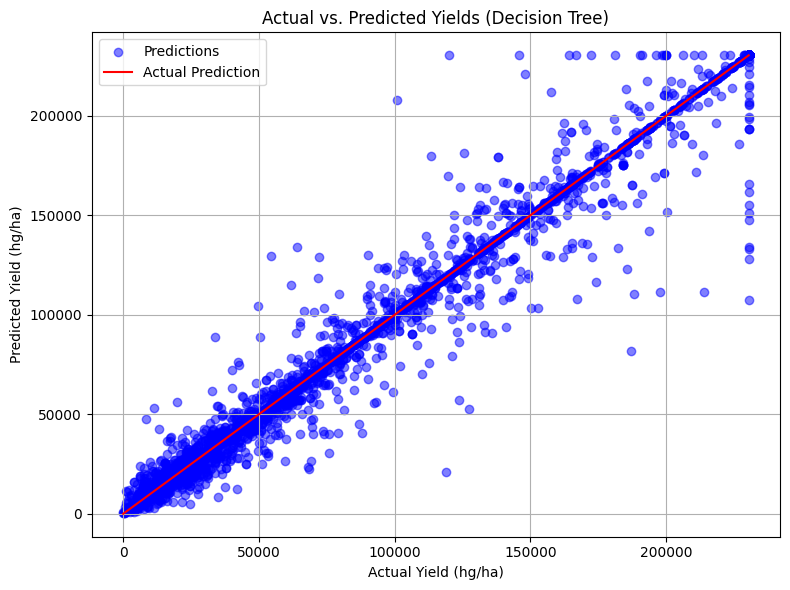

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction, alpha=0.5, color='blue', label='Predictions')
# Add 45-degree line
max_yield = max(max(results['Actual']), max(results['Predicted']))
plt.plot([0, max_yield], [0, max_yield], color='red', linestyle='-', label='Actual Prediction')
# Customize plot
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Actual vs. Predicted Yields (Decision Tree)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# Save the plot
plt.savefig('actual_vs_predicted_yields.png')
plt.close()

# ***THE END !!!***

# **Demo of Web Application**